
         ________DEVOIR INFO 4127 : TECHNIQUES D'OPTIMISATIONS _____________
         
         
GROUPE 5 :
         
         liste des membres par ordre alphabétique : 
         
         * LINKEU WANDJI GAEL 
         * NGANE FABRICE
         * NKEWA CONSTANCE DIANA
         * WOUATCHI BEUMO ANNE GENIALE  18T2506
         
         

Importations des librairies utilisées

In [1]:
from IPython.display import *
from sympy.plotting import * 
from matplotlib import pyplot as plt
import sympy as sp
sp.init_printing(use_latex=True)

Définitions des fonctions utiles 




1° AFFICHAGE GRAPHIQUE DE LA FONCTION




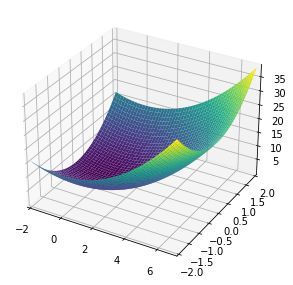



2° EQUATION DE LA FONCTION


F(X,Y)=



3° Grandient de la fonction 


[1.0*X, 7.0*Y]


In [2]:
def f(x,y):
    return (1/2)*(x)**2 + (7/2)*(y) ** 2

#Fonction dérivée de f
def df(x, y):
    return (x, 7*y)

#Fonction de normalisation
def normaliser(vector):
    vector = sp.Matrix(vector)
    norm = 0
    for x in vector:
        norm += x**2
    return sp.sqrt(norm)
#Calcule du gradient de la fonction
def CalculGradient(f,symbols):
    grad=[]
    for sym in symbols:
        grad.append(sp.diff(f,sym))
    return grad

#Répresentation graphique de la fonction 
X,Y=sp.symbols("X Y")
print("\n\n\n1° AFFICHAGE GRAPHIQUE DE LA FONCTION\n\n")
plot3d((1/2)*X**2+(7/2)*Y**2, (X,-2,7), (Y,-2,2))

#Equation  de la fonction
print("\n\n2° EQUATION DE LA FONCTION\n\n")


print("F(X,Y)=",end="")
display(((1/2)*X**2+(7/2)*Y**2))
print("\n\n3° Grandient de la fonction \n\n")
elt= CalculGradient((1/2)*X**2+(7/2)*Y**2,(X,Y))
print(elt)

4° Algorithmes de gradient à pas Fixe



PAS FIXE : le nombre d'itération  1000  pour une precision de 10e-10 nous donne comme minimum (x,y) = ( 3.704275923421527e-22 , 1.2287057818445674e-187 )


 ___Un fichier TableauFixe.txt a été généré___


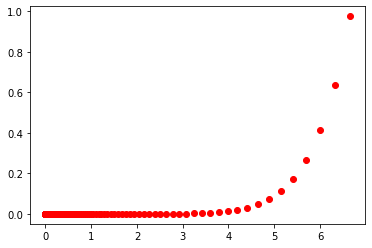

In [3]:
def pasfixe(f, df, a, b, alpha, eps=10 ** (-10), maxiter=1000):
    # Recherche le minimum d'une fonction f par descente de gradient
    # df doit être la dérivée de f
    # a,b sont les valeurs initiales
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 1/100)
    # eps est la précision souhaitée (par défaut 1/1000000000)
    # maxIter est le nombre maximum d'itération (par défaut 1000)
    grad = df(a, b)
    i = 0
    fichier = open("tableauFixe.txt","a")
    fichier.write("i"+"        "+"f(a,b)"+"        "+"pas"+"       "+"a"+"       "+"b"+"       \n\n")
    while (i< maxiter) or (normaliser((grad[0],grad[1]))>eps):  # tant que la pente n'est pas approximativement nulle
        grad = df(a, b)  # on calcule la pente
        a = a - alpha * grad[0]  # on effectue un petit pas vers le bas
        b = b - alpha * grad[1]
        plt.plot(a,b, marker="o", color="red")
        i += 1
        fichier.write(str(i)+"        "+str(f(a,b))+"        "+str(alpha)+"       "+str(a)+"       "+str(b)+"       \n\n")
    print("\n\nPAS FIXE : le nombre d'itération ", i, " pour une precision de 10e-10 nous donne comme minimum (x,y) = (", a, ",", b,")")
    print("\n\n ___Un fichier TableauFixe.txt a été généré___")
    fichier.close()
    
    
pasfixe(f, df, 7, 1.5, alpha=0.05, eps=10 ** (-10), maxiter=1000)

2°) Algorithme de gradient à pas optimale



PAS OPTIMALE : le nombre d'itération  1000  pour une precision de 10e-10 nous donne comme minimum (x,y) = ( 1.0217283016052651e-140 , 2.1894177891541434e-141 )


 ___Un fichier Tableauoptimal.txt a été généré___


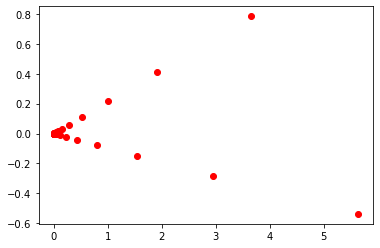

In [4]:
def pasoptimal(f, df, a, b, eps=10 ** (-10), maxiter=1000):
    # Recherche le minimum d'une fonction f par descente de gradient
    # df doit être la dérivée de f
    # a,b sont les valeurs initiales
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 1/100)
    # eps est la précision souhaitée (par défaut 1/1000000000)
    # maxIter est le nombre maximum d'itération (par défaut 1000)
    grad = df(a, b)
    i = 0
    fichier = open("tableauOptimal.txt","a")
    fichier.write("i"+"        "+"f(a,b)"+"        "+"pas"+"       "+"a"+"       "+"b"+"       \n\n")
    while (i< maxiter) or (normaliser((grad[0],grad[1]))>eps):  # tant que la pente n'est pas approximativement nulle
        grad = df(a, b)  # on calcule la pente
        alpha = (a ** 2 + (7 ** 2) * b ** 2) / (a ** 2 + (7 ** 3) * b ** 2)
        a = a - alpha * grad[0]  # on effectue un petit pas vers le bas
        b = b - alpha * grad[1]
        plt.plot(a,b, marker="o", color="red")
        i += 1
        fichier.write(str(i)+"        "+str(f(a,b))+"        "+str(alpha)+"       "+str(a)+"       "+str(b)+"       \n\n")
    print("\n\nPAS OPTIMALE : le nombre d'itération ", i, " pour une precision de 10e-10 nous donne comme minimum (x,y) = (", a, ",", b,")")
    print("\n\n ___Un fichier Tableauoptimal.txt a été généré___")
    fichier.close()
    
    
pasoptimal(f, df, 7, 1.5, eps=10 ** (-10), maxiter=1000)

5° Algorithmes de gradient a pas fixe avec Armijo



ARMIJO : le nombre d'itération  51 pour un pas initialle de 0.125  nous donne comme minimum (x,y) = ( 6.160812695180852 , 0.5251745775531981 ) avec f(x,y) = 19.94313571172941


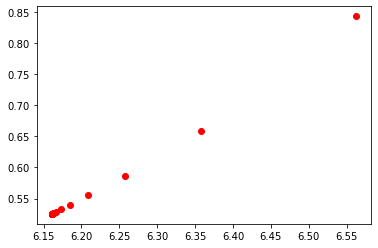

In [5]:
def amijo(f,x,y,df,s0,e1=10**(-4),e2=0.99,eps = 10**(-10),maxinter=1000):
    k = 0
    s_moins = 0
    s_plus = s0
    grad = df(x, y)
    f1 = f(x + s_plus*grad[0] ,y + s_plus*grad[1])
    f2 = f(x,y) + e1*s_plus*(grad[0]**2 + grad[1]**2)
    fichier = open("tableauAmijo.txt","a")
    fichier.write(str(k)+"        "+str(f(x,y))+"        "+str(s_plus)+"       "+str(x)+"       "+str(y)+"       \n\n")
    while (normaliser((grad[0],grad[1]))>eps) and f1 > f2 and k<maxinter:
        s_plus =  (s_plus+s_moins)/2
        x = x - s_plus * grad[0]
        y = y - s_plus * grad[1]
        plt.plot(x,y, marker="o", color="red")
        grad = df(x, y)
        f1 = f(x + s_plus * grad[0], y + s_plus * grad[1])
        f2 = f(x, y) + e1 * s_plus * (grad[0] ** 2 + grad[1] ** 2)
        fichier.write(str(k)+"        "+str(f(x,y))+"        "+str(s_plus)+"       "+str(x)+"       "+str(y)+"       \n\n")
        k += 1
        #print(k, "-", f(x, y), "|", x, "|", y, "|", s_plus, "|", f1, "|", f2, "|", f3, "|", f4)
    print("\n\nARMIJO : le nombre d'itération ", k ,"pour un pas initialle de",s0," nous donne comme minimum (x,y) = (", x, ",", y,
          ") avec f(x,y) =", f(x, y))
    fichier.close()


amijo(f, 7, 1.5, df, 0.125, e1=10 ** (-4), e2=0.99, eps=10 ** (-10), maxinter=1000)

6° Algorithmes du gradient à pas fixe avec wolfe



 WOLF : le nombre d'itération  20 pour un pas initialle de 1e-05  nous donne comme minimum (x,y) = ( 6.546807224852381 , 0.9198197448164089 ) avec f(x,y) = 24.391581690029103


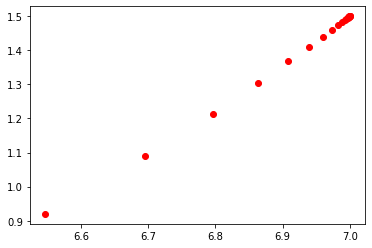

In [6]:
def wolfe(f,x,y,df,s0,e1=10**(-4),e2=0.99,eps = 10**(-10),maxinter=1000):
    k = 0
    s_moins = 0
    s_plus = s0
    grad = df(x, y)
    f1 = f(x + s_plus*grad[0] ,y + s_plus*grad[1])
    f2 = f(x,y) + e1*s_plus*(grad[0]**2 + grad[1]**2)
    grad_x_plus_sd = df(x + s_plus*grad[0] ,y + s_plus*grad[1])
    f3 = grad_x_plus_sd[0]*grad[0] + grad_x_plus_sd[0]*grad[0]
    f4 = e2*(grad[0]**2 + grad[1]**2)
    fichier = open("tableauwolfe.txt","a")
    fichier.write(str(k)+"        "+str(f(x,y))+"        "+str(s_plus)+"       "+str(x)+"       "+str(y)+"       \n\n")
    while (normaliser((grad[0],grad[1]))>eps) and (f1 > f2 and f3 < f4) and k<maxinter:
        if f1 > f2 :
            s_plus =  (s_plus+s_moins)/2
        if  f3 < f4 :
            s_moins = s_plus
            s_plus = 2*s_plus
        x = x - s_plus * grad[0]
        y = y - s_plus * grad[1]
        plt.plot(x,y, marker="o", color="red")
        grad = df(x, y)
        f1 = f(x + s_plus * grad[0], y + s_plus * grad[1])
        f2 = f(x, y) + e1 * s_plus * (grad[0] ** 2 + grad[1] ** 2)
        grad_x_plus_sd = df(x + s_plus * grad[0], y + s_plus * grad[1])
        f3 = grad_x_plus_sd[0] * grad[0] + grad_x_plus_sd[0] * grad[0]
        f4 = e2 * (grad[0] ** 2 + grad[1] ** 2)
        fichier.write(str(k)+"        "+str(f(x,y))+"        "+str(s_plus)+"       "+str(x)+"       "+str(y)+"       \n\n")
        k += 1
    print("\n\n WOLF : le nombre d'itération ", k, "pour un pas initialle de", s0, " nous donne comme minimum (x,y) = (", x, ",", y,") avec f(x,y) =", f(x, y))
    fichier.close()
    
    
wolfe(f, 7, 1.5, df, 0.00001, e1=10 ** (-4), e2=0.99, eps=10 ** (-10), maxinter=1000)


7° Algorithme du gradient à pas fixe avec recherche lineaire partielle 

In [ ]:
def recherche_lineaire_partielle(f, df, alpha, a, b, eps=10 ** (-10), maxiter=1000):
    # Recherche le minimum d'une fonction f par descente de gradient
    # df doit être la dérivée de f
    # a,b sont les valeurs initiales
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 1/100)
    # eps est la précision souhaitée (par défaut 1/1000000000)
    # maxIter est le nombre maximum d'itération (par défaut 1000)
    grad = df(a, b)
    i = 0
    while (normaliser((grad[0],grad[1]))>eps):  # tant que la pente n'est pas approximativement nulle
        grad = df(a, b)  # on calcule la pente
        alpha = recherche_lineaire_partielle_f(f, alpha, df, a, b)
        a = a - alpha * grad[0]  # on effectue un petit pas vers le bas
        b = b - alpha * grad[1]
        i += 1
        # print(i, "|", f(a, b), "|", alpha, "|", a, "|", b)  # décommenter cette ligne pour imprimer les itérations
        if i > maxiter:
            return None
    print("le nombre d'itération ", i, " pour une precision de 10e-10 nous donne comme minimum (x,y) = (", a, ",", b,
          ") avec f(x,y) =", f(a, b))
def recherche_lineaire_partielle_f(f,s,df,x,y):
    T = [1/2 , 1/3,1/5,1/7]
    j=0
    S = [0,0,0,0]
    while j<4:
        S[j]=s*T[j]
    d= df(x,y)
    min = f(x + S[0] * d[0], y + S[0] * d[1])
    h = 0
    i=1
    while i<4:
        T[i] = f(x + S[i] * d[0], y + S[i] * d[1])
        if (min > T[i]):
            min = T[i]
            h = i
        i+=1
    return S[h]


recherche_lineaire_partielle(f, df, 7, 1.5, 0.125, eps=10 ** (-10), maxiter=1000)

8° Algorithme à pas fixe avec recherche avec rebroussement

In [ ]:
def recherche_linéaire_avec_reboussement_f(f, s1, s2, d, x, y):
    s = s1
    while f(x + s * d[0], y + s * d[1]) >= f(x, y):
        s = (s + s2) / 2
    return s



def recherche_linéaire_avec_reboussement(f, df, alpha, a, b, eps=10 ** (-10), maxiter=1000):
    # Recherche le minimum d'une fonction f par descente de gradient
    # df doit être la dérivée de f
    # a,b sont les valeurs initiales
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 1/100)
    # eps est la précision souhaitée (par défaut 1/1000000000)
    # maxIter est le nombre maximum d'itération (par défaut 1000)
    grad = df(a, b)
    i = 0
    fichier = open("tableauRebroussement.txt","a")
    fichier.write("i"+"        "+"f(a,b)"+"        "+"pas"+"       "+"a"+"       "+"b"+"       \n\n")
    while (i< maxiter) or (normaliser((grad[0],grad[1]))>eps):  # tant que la pente n'est pas approximativement nulle
        grad = df(a, b)  # on calcule la pente
        alpha = recherche_linéaire_avec_reboussement_f(f, alpha, 0, grad, a, b)
        a = a - alpha * grad[0]  # on effectue un petit pas vers le bas
        b = b - alpha * grad[1]
        plt.plot(a,b, marker="o", color="red")
        i += 1
        # print(i, "|", f(a, b), "|", alpha, "|", a, "|", b)  # décommenter cette ligne pour imprimer les itérations
        
        fichier.write(str(i)+"        "+str(f(a,b))+"        "+str(alpha)+"       "+str(a)+"       "+str(b)+"       \n\n")
    print("\n\nPAS AVEC REBROUSSEMENT : le nombre d'itération ", i, " pour une precision de 10e-10 nous donne comme minimum (x,y) = (", a, ",", b,")")
    print("\n\n ___Un fichier tableauRebroussement.txt a été généré___")
    fichier.close()

recherche_linéaire_avec_reboussement(f, df, 0.125, 7, 1.5, eps=10 ** (-10), maxiter=1000)

COMMENTAIRE : 
    les différents graphiques plus haut montre l'implementation des différentes méthodes de recherche lineaire(choix de la taille du pas )
    sur l'exemple faite en cours.